## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

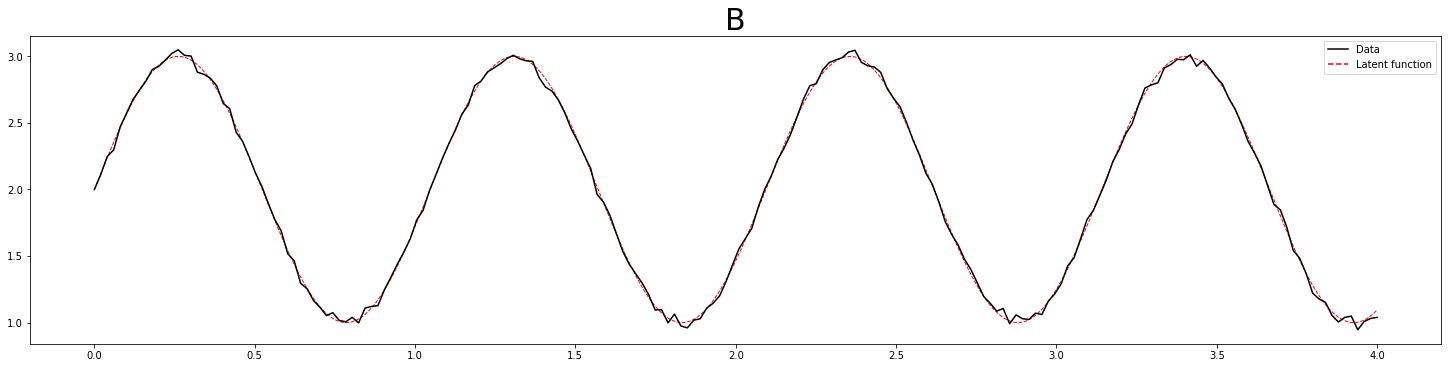

In [2]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)
data.plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.init_params()
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.data[0].set_pred_range(0.0, 5.0, 2000)
sm.predict()
sm.data[0].plot()

In [ ]:
sm.save('sm')

In [ ]:
sm2 = mogptk.LoadModel('sm')
sm2.data[0].set_pred_range(0.0, 10.0, n=2000)
sm2.predict()
sm2.data[0].plot()

## MOSM

In [3]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([1.52143753]),
  'mean': array([[2.13336341]]),
  'variance': array([[0.11729996]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-0.0039274]),
  'mean': array([[0.10859469]]),
  'variance': array([[0.09073948]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([0.89347813]),
  'mean': array([[-0.95070809]]),
  'variance': array([[0.21267549]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.54612271])}]

In [ ]:
mosm.init_params(plot=True)
display(mosm.get_params())

In [4]:
mosm.train()
display(mosm.get_params())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -376.736024
  Number of iterations: 61
  Number of functions evaluations: 90
Done in  0.07013803323109945  minutes


[{'magnitude': array([0.90539321]),
  'mean': array([[1.e-06]]),
  'variance': array([[5.13393601]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-0.12162157]),
  'mean': array([[0.08463804]]),
  'variance': array([[0.02615105]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([34.35301358]),
  'mean': array([[1.e-06]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.00033713])}]

In [ ]:
mosm.data[0].set_pred_range(0, 0.0, 5.0, n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [5]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[0.06747935]]),
  'mean': array([0.53199223]),
  'variance': array([0.33820481])},
 {'constant': array([[0.20800144]]),
  'mean': array([0.99611843]),
  'variance': array([0.12337882])},
 {'constant': array([[-1.52924659]]),
  'mean': array([0.79977847]),
  'variance': array([0.58019143])},
 {'noise': array([0.43896793])}]

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [6]:
smlmc.train()
display(smlmc.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -427.317334
  Number of iterations: 77
  Number of functions evaluations: 133
Done in  0.054907174905141194  minutes


[{'constant': array([[4.04703069]]),
  'mean': array([1.00040489e-06]),
  'variance': array([1.00000002e-06])},
 {'constant': array([[0.00826282]]),
  'mean': array([1.21123624]),
  'variance': array([0.66608994])},
 {'constant': array([[-0.65336389]]),
  'mean': array([5.99775818]),
  'variance': array([1.e-06])},
 {'noise': array([2.06050771e-05])}]

In [ ]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [7]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.14894991]]),
  'mean': array([0.6280118]),
  'variance': array([0.74355951]),
  'phase': array([[0.]])},
 {'constant': array([[0.03545908]]),
  'mean': array([0.13563949]),
  'variance': array([0.26094798]),
  'phase': array([[0.]])},
 {'constant': array([[0.31647264]]),
  'mean': array([0.56148216]),
  'variance': array([0.65385859]),
  'phase': array([[0.]])},
 {'noise': array([0.9549155])}]

In [ ]:
csm.init_params()
display(csm.get_params())

In [8]:
csm.train()
display(csm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -426.529763
  Number of iterations: 88
  Number of functions evaluations: 148
Done in  0.06319982210795085  minutes


[{'constant': array([[0.46667806]]),
  'mean': array([5.99894312]),
  'variance': array([1.00013395e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[1.23669344e-06]]),
  'mean': array([0.03810063]),
  'variance': array([0.00821517]),
  'phase': array([[1.e-06]])},
 {'constant': array([[3.18331126]]),
  'mean': array([1.e-06]),
  'variance': array([1.e-06]),
  'phase': array([[1.e-06]])},
 {'noise': array([3.66346591e-05])}]

In [ ]:
csm.set_prediction_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [9]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.22322742]), 'variance': array([[0.]])},
 {'constant': array([0.72152491]), 'variance': array([[0.]])},
 {'constant': array([0.45579002]), 'variance': array([[0.]])},
 {'noise': array([0.49461869])}]

In [ ]:
cg.init_params()
display(cg.get_params())

In [10]:
cg.train(method='Adam')
display(cg.get_params())

Done in  0.13802313804626465  minutes


[{'constant': array([0.42636051]), 'variance': array([[1.e-06]])},
 {'constant': array([1.11601433]), 'variance': array([[1.e-06]])},
 {'constant': array([0.77198374]), 'variance': array([[1.e-06]])},
 {'noise': array([0.23524795])}]

In [ ]:
cg.set_prediction_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot(cg)